In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

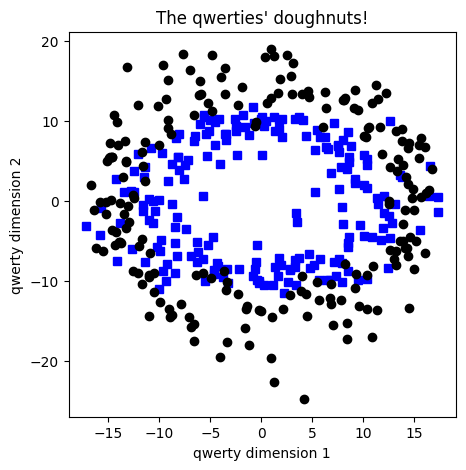

In [15]:
nPerClust = 200

th = np.linspace(0,4*np.pi,nPerClust)
r1 = 10
r2 = 15

# generate data
a = [ r1*np.cos(th) + np.random.randn(nPerClust)*3 ,
      r1*np.sin(th) + np.random.randn(nPerClust) ]
b = [ r2*np.cos(th) + np.random.randn(nPerClust) ,
      r2*np.sin(th) + np.random.randn(nPerClust)*3 ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=.2)

train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

batchSize = 16
train_loader = DataLoader(train_data, batch_size=16, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [17]:
class theModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(2,128)
        self.hidden = nn.Linear(128,128)
        self.output = nn.Linear(128,1)

    def forward(self,x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden(x))
        x = self.output(x)

        return x

In [18]:
def createTheModel():
    ANN = theModel()

    lossfun = nn.BCEWithLogitsLoss()

    optimizer = torch.optim.SGD(params=ANN.parameters(), lr=0.01)

    return ANN, lossfun, optimizer

In [19]:
numEpochs = 500

def trainTheModel(ANN, lossfun, optimizer):
    trainAcc = []
    testAcc = []

    for epochi in range(numEpochs):
        batchAcc = []
        for X,y in train_loader:
            yHat = ANN(X)

            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())

        trainAcc.append(np.mean(batchAcc))

        tstacc = []
        for X,y in test_loader:
            yHat = ANN(X)
            tstacc.append(100*torch.mean(((yHat>0)==y).float()).item())

        testAcc.append(np.mean(tstacc))

    return trainAcc, testAcc

In [20]:
ANN, lossfun, optimizer = createTheModel()

trainAcc, testAcc = trainTheModel(ANN, lossfun, optimizer)

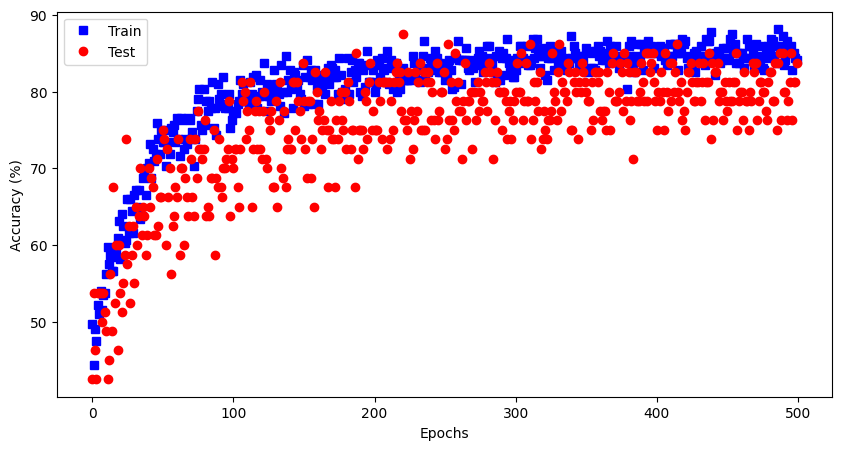

In [21]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'bs')
plt.plot(testAcc,'ro')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

plt.show()